$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 2** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Linear and Bayesian Regression**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide, Vasileios** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 23 April** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Lars Jansson, 880906-7492, larjans@student.chalmers.se <br/> $\qquad$ $\qquad$ $\qquad$ $\qquad$ $\qquad$ Tobias Sandström, 890102-4813, tobsand@student.chalmers.se

General guidelines:
* All solutions to theoretical and pratical problems must be submitted in this ipynb notebook, and equations wherever required, should be formatted using LaTeX math-mode.
* All discussion regarding practical problems, along with solutions and plots should be specified in this notebook. 
All plots/results should be visible such that the notebook do not have to be run. But the code in the notebook should reproduce the plots/results if we choose to do so.
* Your name, personal number and email address should be specified above.
* All tables and other additional information should be included in this notebook.
* ** Before submitting, make sure that your code can run on another computer. That all plots can show on another computer including all your writing. It is good to check if your code can run here: https://colab.research.google.com **

**Jupyter/IPython Notebook** is a collaborative Python web-based environment. This will be used in all our Homework Assignments. It is installed in the halls ES61-ES62, E-studio and MT9. You can also use google-colab: https://colab.research.google.com
to run these notebooks without having to download, install, or do anything on your own computer other than a browser.
Some useful resources:
1. https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/ (Quick-start guide)
2. https://www.kdnuggets.com/2016/04/top-10-ipython-nb-tutorials.html
3. http://data-blog.udacity.com/posts/2016/10/latex-primer/ (latex-primer)
4. http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html (markdown)


# [Linear Regression with regularization 11pt]

You are newly recruited as a Data Scientist at a leading consultancy company in Gothenburg. Your first task at the job is to help the Swedish Public Health Agency (folkhalsomyndigheten) for predicting the diabetes progression of patients. Assume that you are given a dataset D of $n$ patients with $D = \{ (\mathbf{x}_i, y_i)\}_{i=1}^n$ where $\mathbf{x}_i \in \mathbb{R}^p$ represents numerical features of each patients and $y_i \in \mathbb{R}$ represent the numerical diabetes progression.  One can also view the dataset D as a pair of matrices $(\mathbf{X}, \mathbf{y})$ with $\mathbf{X} \in \mathbb{R}^{n \times p}$ and $\mathbf{y} \in \mathbb{R}^{n \times 1}$.

Fresh with the lectures in the machine learning course at Chalmers, you would like to use a linear model to quickly perform the task. In order words, you would like to find a vector $\mathbf{w} \in \mathbb{R}^{p \times 1}$  such that $\mathbf{y} = \mathbf{X} \mathbf{w}$.  However,  you have just read one of the most popular machine learning book and it argues that standard linear regression (for finding $\mathbf{w}$) can lead to various problems such as non-uniqueness of the solution,  overfitting .... As a result, you decided to add a penalty term called regularization to control the optimisation problem. More specifically, you want to solve for: $\min_{\mathbf{w}}  \mathcal{L}(\mathbf{w})$ where  $\mathcal{L}(\mathbf{w}) = \left(\sum_{i=1}^n (y_i - \mathbf{w}^T\mathbf{x}_i)^2 \right) + \left(\alpha \sum_{j=1}^p w_j^2 \right) $ with $\alpha \in \mathbb{R}$ a small coefficient that you will decide later on.

1-  **1pt** Write down $\mathcal{L}(\mathbf{w})$ in matrix/vector forms using only $\mathbf{X}$, $\mathbf{y}$ and $\mathbf{w}$ and the L2 norm. In other words, you are not allowed to use any components $y_i, \mathbf{w}_j$ or $\mathbf{x}_i$ ( For any vector $\mathbf{z}$ use the following notation $|\mathbf{z}|_2$ to mean the L2 norm of  $\mathbf{z}$ See http://mathworld.wolfram.com/L2-Norm.html for more information about the L2 norm.)

$\mathcal{L}(\mathbf{w}) = (\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}-\mathbf{X}\mathbf{w}) + \alpha \mathbf{w}^T\mathbf{w} = |\mathbf{y}-\mathbf{X}\mathbf{w}|_2^2 + \alpha |\mathbf{w}|_2^2$ 


2- **1pt** Derive and write down in matrix/vector forms the gradient of $\mathcal{L}(\mathbf{w})$ with respect to $\mathbf{w}$. Show all the derivations. (Hint: You can start by  computing the gradient of the full expression and then convert it to matrix/vector forms. You can also directly get the gradients from your answer in 1-)

$ \frac{\partial \mathcal{L}(\mathbf{w})}{\partial \mathbf{w}} = \frac{\partial}{\partial \mathbf{w}}(\text{constants} + 2\mathbf{y}^T\mathbf{X}\mathbf{w}-\mathbf{w}^T\mathbf{X}^T\mathbf{X}\mathbf{w} + \alpha \mathbf{w}^T\mathbf{w})=2(\mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{X}^T\mathbf{y}+\alpha\mathbf{w})$

3- **2pt** Derive and write down in matrix/vector forms the solution $\mathbf{w}^*$ to the optimization problem $\min_{\mathbf{w}}  \mathcal{L}(\mathbf{w})$. Show all your derivations. (Hint: $\mathcal{L}(\mathbf{w})$ is convex in $\mathbf{w}$)

Since the $\mathcal{L}(\mathbf{w})$ is a convex function any stationary point has to be a global minimum of the function. Setting the derivative of $\mathcal{L}(\mathbf{w})$ to zero gives the minimum.

$ \frac{\partial \mathcal{L}(\mathbf{w})}{\partial w} = 0 \Rightarrow 2(\mathbf{X}^T\mathbf{X}\mathbf{w}-\mathbf{X}^T\mathbf{y}+\alpha\mathbf{w}) = 0 \Rightarrow \mathbf{w}=(\mathbf{X}^T\mathbf{X}+\alpha\mathbf{I})^{-1}\mathbf{X}^T\mathbf{y}$

4-  **2pt** Under which condition on the $\alpha$ is the solution $\mathbf{w}^*$ unique? Prove rigorously your statement. Make no assumptions on $\mathbf{X}$. (Hint: If your solution $\mathbf{w}^*$ requires to invert a matrix, then one necessary condition for uniquess is for the matrix to be invertible. And any positive definitive matrix https://en.wikipedia.org/wiki/Definiteness_of_a_matrix is invertible. You might also want to look at the properties of transposition https://en.wikipedia.org/wiki/Transpose)

It is know that every system of linear equations, $y=Ax$, have unique solutions if matrix $A$ is invertible with answer $x=A^{-1}y$. In the answer to (3) it is analogous to matrix $\mathbf{X}^T\mathbf{X}+\alpha\mathbf{I}$ being invertible. From the hint we can use the fact that any positive definite matrix is also invertible. The definition of a positive definite matrix: A symmetric matrix $\mathbf{A} \in \mathbb{R}^{n\times n}$ is positive definite if $\mathbf{x}^T\mathbf{A}\mathbf{x}>0$ for any non-zero vector $\mathbf{x}\in \mathbb{R}^n$

It is trivial to see that $\mathbf{X}^T\mathbf{X}+\alpha\mathbf{I}$ is indeed symmetric since the transpose of a matrix times itself is symmetric and adding the identity matrix multiplied by a factor only effects the diagonal elements. Multiplying with a non-zero vector $\mathbf{z}\in \mathbb{R}^p$ gives

$\mathbf{z}^T(\mathbf{X}^T\mathbf{X}+\alpha\mathbf{I})\mathbf{z}=\mathbf{z}^T\mathbf{X}^T\mathbf{X}\mathbf{z}+\alpha\mathbf{z}^T\mathbf{z} = |\mathbf{Xz}|^2+\alpha |\mathbf{z}|^2$

We can't make any assumptions on $\mathbf{X}$, therefore the first term is possibly zero. To guarantee that the matrix is positive definite the second term therefore has to be greater than zero. The norm of a non-zero vector is always greater than zero hence the matrix is positive definite for any $\mathbf{X}$ if $\alpha>0$.

5- **2pt** Implement in Python a well commented function **fit_linear_with_regularization** that takes as input $\mathbf{X}$, $\mathbf{y}$ and $\alpha$ and return $\mathbf{w}^*$ as computed in question 3. You are not allowed to use any loops (for-loop, while-loop ...) to do the implementation. Instead use and abuse as much as possible numpy vectorization techniques. A skeleton of the function is shown in the code cell below.

6- **3pt** Implement in Python a well commented function **predict** that takes as input a dataset $\mathbf{X_{\text{test}}}$ in the same dimensions as $\mathbf{X}$ and return the predictions.   Write down the mean squared error (https://en.wikipedia.org/wiki/Mean_squared_error) of your predictions. Then on the same plot with legends, show:

 a) A scatter plot of the first feature of $\mathbf{X_{\text{test}}}$ (x-axis) and the diabetes progression $\mathbf{y_{\text{test}}}$ 
 
 b) A plot of your prediction for $\mathbf{X_{\text{test}}}$
 
 The skeleton code in the cell below already implements most of data loading and you should only have to fill in the *TODO* part. Again here no loops are allowed (for-loop, while loop in the implementation of the plots and the **predict** )
 
 **Bonus question**
 
In the code from the cell below, we use alpha = 0.01. If you want, you could check if you can improve the mean squared error by using a different value of strictly positive alpha  and/or by normalizing the input features $\mathbf{X}$. 

Finding this improvement, will not give you any additional points. Not finding an improvement  will not prevent you from getting full points (if all questions with points are answered correctly). However, if you find an improvement, we will pick exactly one question where you didn't receive full points in this assignment and give you full points there. In particular,  between the questions for which you have reasonably attempted a solution, we will pick the one where the difference between the full point and the point you received is the maximum.

After normalization using the min-max scalling the MSE drops by a factor of 10. By simple trial and error there are a lot of alphas that lowers the MSE even further.






Mean Squared error is 1998.85


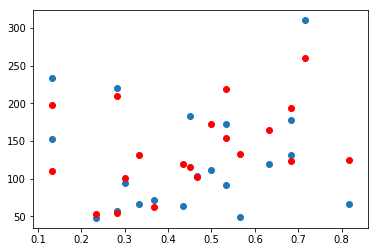

In [9]:
import numpy as np
from sklearn import datasets
from sklearn import preprocessing
import matplotlib.pyplot as plt


def fit_linear_with_regularization(X, y, alpha):
    """
    This function computes parameter w using linear regression with regularization

    @param X : An array of size n x p where each row represents a p-dimensional data point
    @param y : target vector, with dimension p x 1
    @param alpha : regularization parameter
    @return w : linear regression coefficient with regularization
    """
    p = X.shape[1]
    w = np.matmul(np.linalg.inv(np.matmul(np.transpose(X), X) + alpha * np.identity(p)), np.matmul(np.transpose(X), y))
    return w


def predict(X_test, w):
    """
    Makes response prediction from data X_test using linear regression. y = Xw

    @param X_test : Test data of size n x p where each row represents a p-dimensional data point
    @param w : Regression coefficients

    @return y_pred : Predicted response
    """
    y_pred = np.matmul(X_test, w)
    return y_pred


def plot_prediction(X_test, y_test, y_pred):
    """
    Plots a scatter plot of feature and response pairs using the first feature in X_test. Test responses
    are represented by blue dots and predictions as red.

    @param X_test : Test data of size n x p where each row represents a p-dimensional data point
    @param y_test : Test response, with dimension p x 1
    @param y_pred : Predicted response, with dimension p x 1
    @return mean_squared_error : Mean squared error between test data and prediction
    """
    plt.scatter(X_test[:, 0], y_test)
    plt.scatter(X_test[:, 0], y_pred, color='red')

    mean_squared_error = np.dot(y_test - y_pred, y_test - y_pred) / y_test.shape[0]
    return mean_squared_error


def normalize(X):
    """
    Normalize X using min-max feature scaling

    @param X : Matrix to normalize
    @return X_norm: Normalized matrix of X
    """
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)
    X_norm = np.divide(X-X_min, X_max-X_min)
    return X_norm


X, y = datasets.load_diabetes(return_X_y=True)
X = normalize(X)

num_test_elements = 20

X_train = np.array(X[:-num_test_elements])
X_test = np.array(X[-num_test_elements:])
y_train = np.array(y[:-num_test_elements])
y_test = np.array(y[-num_test_elements:])

alpha = 0.05

w = fit_linear_with_regularization(X_train, y_train, alpha)
y_pred = predict(X_test, w)
error = plot_prediction(X_test, y_test, y_pred)

print('Mean Squared error is %.2f' %error)
plt.show()



# Bayesian Linear Regression   4pt

Proud of finishing the task using a linear model with regularization, you show your results to a representative of the Swedish Public Health Agency. You barely finish explaining your solution when the face of the representative turns red and you could distinctly hear: "Bayesian is the only way: How come didn't you use any probabilities?". 

You quickly head back to your desk and now assume a Gaussian prior on the solution $\mathbf{w}$, that is $p(\mathbf{w}) = \mathcal{N}(\mathbf{0}, \lambda^{-1} \mathbf{I})$ where $\lambda \in \mathbb{R}$ is a constant real number, $I$ is the $p \times p$ identity matrix and $\mathcal{N}(\mathbf{0}, \lambda^{-1} \mathbf{I})$ is used to mean the multivariate gaussian distribution with mean $\mathbf{0} \in \mathbb{R}^p$ , a vector of zeros of dimension $p$ and covariance matrix $\lambda^{-1} \mathbf{I}$ . Then, you use the following likelihood:

$p(\mathbf{y} | \mathbf{X}, \mathbf{w}) = \prod_{i=1}^n \mathcal{N}(\mathbf{w}^T \mathbf{x}_i, \gamma^{-1})$ where here $\gamma \in \mathbb{R}$ is a constant real number and $\mathcal{N}(\mathbf{w}^T \mathbf{x}_i, \gamma^{-1})$ is the gaussian distribution with mean  $\mathbf{w}^T \mathbf{x}_i$ and variance $\gamma^{-1}$.

7- **2pt** Derive and express in vector/matrix form as a function of $\mathbf{X}, \mathbf{y}, \mathbf{w}$ the log posterior $\ln p(\mathbf{w} | \mathbf{y}, \mathbf{X})$. Show all the derivations. You can ignore normalizing constants.

First of all we have Bayes formula:

$p(\mathbf{w} | \mathbf{y},\mathbf{X})=\frac{p(\mathbf{y} | \mathbf{X},\mathbf{w})p(\mathbf{w})}{p(\mathbf{y} | \mathbf{X})}$

We also know the prior $p(\mathbf{w})$ and the likelihood $p(\mathbf{y} | \mathbf{X},\mathbf{w})$:

$p(\mathbf{w})=\mathcal{N}(0,\lambda^{-1}\mathbf{I}), p(\mathbf{y} | \mathbf{X},\mathbf{w})=\prod_{i=1}^n \mathcal{N}(\mathbf{w}^T \mathbf{x}_i, \gamma^{-1})$

Since both the prior and the likelihood are Gaussian, we know that the posterior $p(\mathbf{w} | \mathbf{y},\mathbf{X})$ also will be Gaussian. We therefore neglect all normalization constants (like the marginal likelihood $p(\mathbf{y} | \mathbf{X})$). This gives us:

$p(\mathbf{w} | \mathbf{y},\mathbf{X}) \propto e^{-\frac{1}{2}\mathbf{w}^T\lambda\mathbf{w}}\prod_{i=1}^ne^{-\frac{1}{2}(y_i-\mathbf{w}^T\mathbf{x}_i)^T\gamma(y_i-\mathbf{w}^T\mathbf{x}_i)}$

Taking the natural logarithm of this now gives us:

ln$(p(\mathbf{w} | \mathbf{y},\mathbf{X})) \propto  -\frac{\lambda}{2}\mathbf{w}^T\mathbf{w} - \frac{\gamma}{2}\sum_{i=1}^n(y_i-\mathbf{w}^T\mathbf{x}_i)^T(y_i-\mathbf{w}^T\mathbf{x}_i) $

$\iff$

ln$(p(\mathbf{w} | \mathbf{y},\mathbf{X})) \propto -\frac{\lambda}{2}\mathbf{w}^T\mathbf{w} - \frac{\gamma}{2}(\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}-\mathbf{X}\mathbf{w})$



 


8-  **2pt** Show that maximizing the posterior in 7- is  similar to minimizing the function $\mathcal{L}(\mathbf{w})$ seen in the previous section. Show your derivations. (Note: You should show this without computing the maximum of the posterior. Instead, you should express the log posterior in term of $\mathcal{L}(\mathbf{w})$, ignoring constants if necessary. Then find the $\alpha$ of $\mathcal{L}(\mathbf{w})$ in term of $\lambda$ and $\gamma$).

We have:

$\mathcal{L}(\mathbf{w}) = \left(\sum_{i=1}^n (y_i - \mathbf{w}^T\mathbf{x}_i)^2 \right) + \left(\alpha \sum_{j=1}^p w_j^2 \right) $

$\iff$

$\mathcal{L}(\mathbf{w}) = (\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}-\mathbf{X}\mathbf{w}) + \alpha\mathbf{w}^T\mathbf{w}$  $(\ast)$

From the previous task we have:

ln$(p(\mathbf{w} | \mathbf{y},\mathbf{X})) \propto -\frac{\lambda}{2}\mathbf{w}^T\mathbf{w} - \frac{\gamma}{2}(\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}-\mathbf{X}\mathbf{w})$

If we now multiply this with $\frac{2}{\gamma}$ we get:

ln$(p(\mathbf{w} | \mathbf{y},\mathbf{X})) \propto -\frac{\lambda}{\gamma}\mathbf{w}^T\mathbf{w} - (\mathbf{y}-\mathbf{X}\mathbf{w})^T(\mathbf{y}-\mathbf{X}\mathbf{w})$

Comparing this to $(\ast)$ we see that the log posterior is proportional to $-\mathcal{L}(\mathbf{w})$ with $\alpha = \frac{\lambda}{\gamma}$. Hence, maximizing the log posterior is equivalent to minimizing the loss function $\mathcal{L}(\mathbf{w})$.









